In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras import models, layers, optimizers
import math
from pytrends.request import TrendReq
import pytrends

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [103]:
search.index[ind_cur]

Timestamp('2014-01-19 00:00:00')

In [118]:
start = datetime.today() - timedelta(370*5)
end = datetime.today() - timedelta(1)
df = web.DataReader('AAPL', 'iex', start, end)

In [119]:
pytrends = TrendReq(hl='en-US', tz=300)
frame = df.index[0] + ' ' + df.index[-1]
# frame = str(df.index[0].year) + '-' + str(df.index[0].month) + '-' + str(df.index[0].day) + ' ' + str(df.index[-1].year) + '-' + str(df.index[-1].month) + '-' + str(df.index[-1].day)
pytrends.build_payload(["Ford"], timeframe=frame, cat=0, geo='US')
search = pytrends.interest_over_time()

In [120]:
trend_max = max(search.values[:,0])
trend_min = min(search.values[:,0])
trend_range = trend_max - trend_min
trend_med = trend_min + (trend_range / 2)
search_scaled = np.zeros((len(search.values)))
search_scaled = (search.values[:, 0] - trend_med) / trend_range

x = np.zeros((num, 2))
ind_cur = 0
trend_cur = search_scaled[ind_cur]
for i in range(len(x)):
    x[i, 0] = (i / num) - .7
    if (ind_cur < len(search_scaled) and search.index[ind_cur].year == int(df.index[i][:4]) and search.index[ind_cur].month == int(df.index[i][5:7]) and search.index[ind_cur].day <= int(df.index[i][8:])+2 and search.index[ind_cur].day >= int(df.index[i][8:])-2):
        trend_cur = search_scaled[ind_cur]
        ind_cur += 1
    x[i, 1] = trend_cur

In [121]:
stock = df.loc[:,'open']
num = len(stock)
print(num)

y = stock
scaler = MinMaxScaler()
y = np.array(stock).reshape(len(stock), 1)
scaler = scaler.fit(y)
y = scaler.transform(y)
y = y.reshape(len(stock))

shuffle_indices = np.random.permutation(np.arange(len(y)))
y = y[shuffle_indices]
x = x[shuffle_indices]

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(2,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = network.fit(x, y, epochs=2000, batch_size=50, verbose=1)

1259
Epoch 1/2000
1259/1259 [==============================] - 1s 963us/step - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 2/2000
1259/1259 [==============================] - 0s 94us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 3/2000
1259/1259 [==============================] - 0s 115us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 4/2000
1259/1259 [==============================] - 0s 106us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 5/2000
1259/1259 [==============================] - 0s 110us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 6/2000
1259/1259 [==============================] - 0s 114us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 7/2000
1259/1259 [==============================] - 0s 99us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 8/2000
1259/1259 [==============================] - 0s 106us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 9/2000
1259/1259 [==============================] - 0s 95us/ste

1259/1259 [==============================] - 0s 84us/step - loss: 6.4844e-04 - mean_squared_error: 6.4844e-04
Epoch 135/2000
1259/1259 [==============================] - 0s 93us/step - loss: 7.2423e-04 - mean_squared_error: 7.2423e-04
Epoch 136/2000
1259/1259 [==============================] - 0s 93us/step - loss: 6.5611e-04 - mean_squared_error: 6.5611e-04
Epoch 137/2000
1259/1259 [==============================] - 0s 96us/step - loss: 6.9884e-04 - mean_squared_error: 6.9884e-04
Epoch 138/2000
1259/1259 [==============================] - 0s 98us/step - loss: 8.4414e-04 - mean_squared_error: 8.4414e-04
Epoch 139/2000
1259/1259 [==============================] - 0s 95us/step - loss: 8.3801e-04 - mean_squared_error: 8.3801e-04
Epoch 140/2000
1259/1259 [==============================] - 0s 127us/step - loss: 9.0932e-04 - mean_squared_error: 9.0932e-040s - loss: 9.6316e-04 - mean_squared_error: 9.6316e-
Epoch 141/2000
1259/1259 [==============================] - 0s 117us/step - loss: 6.420

1259/1259 [==============================] - 0s 90us/step - loss: 5.0525e-04 - mean_squared_error: 5.0525e-04
Epoch 264/2000
1259/1259 [==============================] - 0s 118us/step - loss: 5.2531e-04 - mean_squared_error: 5.2531e-04
Epoch 265/2000
1259/1259 [==============================] - 0s 109us/step - loss: 4.9429e-04 - mean_squared_error: 4.9429e-04
Epoch 266/2000
1259/1259 [==============================] - 0s 101us/step - loss: 5.3046e-04 - mean_squared_error: 5.3046e-04
Epoch 267/2000
1259/1259 [==============================] - 0s 100us/step - loss: 5.0757e-04 - mean_squared_error: 5.0757e-04
Epoch 268/2000
1259/1259 [==============================] - 0s 86us/step - loss: 5.8003e-04 - mean_squared_error: 5.8003e-04
Epoch 269/2000
1259/1259 [==============================] - 0s 95us/step - loss: 5.1721e-04 - mean_squared_error: 5.1721e-04
Epoch 270/2000
1259/1259 [==============================] - 0s 106us/step - loss: 5.0403e-04 - mean_squared_error: 5.0403e-04
Epoch 271/

1259/1259 [==============================] - 0s 94us/step - loss: 3.8805e-04 - mean_squared_error: 3.8805e-04
Epoch 394/2000
1259/1259 [==============================] - 0s 108us/step - loss: 4.0281e-04 - mean_squared_error: 4.0281e-04
Epoch 395/2000
1259/1259 [==============================] - 0s 112us/step - loss: 3.7780e-04 - mean_squared_error: 3.7780e-04
Epoch 396/2000
1259/1259 [==============================] - 0s 106us/step - loss: 3.8075e-04 - mean_squared_error: 3.8075e-04
Epoch 397/2000
1259/1259 [==============================] - 0s 105us/step - loss: 3.2316e-04 - mean_squared_error: 3.2316e-04
Epoch 398/2000
1259/1259 [==============================] - 0s 110us/step - loss: 3.4922e-04 - mean_squared_error: 3.4922e-04
Epoch 399/2000
1259/1259 [==============================] - 0s 113us/step - loss: 4.1857e-04 - mean_squared_error: 4.1857e-04
Epoch 400/2000
1259/1259 [==============================] - 0s 106us/step - loss: 3.6217e-04 - mean_squared_error: 3.6217e-04
Epoch 40

1259/1259 [==============================] - 0s 94us/step - loss: 3.7963e-04 - mean_squared_error: 3.7963e-04
Epoch 523/2000
1259/1259 [==============================] - 0s 107us/step - loss: 3.0700e-04 - mean_squared_error: 3.0700e-04
Epoch 524/2000
1259/1259 [==============================] - 0s 112us/step - loss: 3.5596e-04 - mean_squared_error: 3.5596e-04
Epoch 525/2000
1259/1259 [==============================] - 0s 96us/step - loss: 2.8168e-04 - mean_squared_error: 2.8168e-04
Epoch 526/2000
1259/1259 [==============================] - 0s 95us/step - loss: 3.1893e-04 - mean_squared_error: 3.1893e-04
Epoch 527/2000
1259/1259 [==============================] - 0s 95us/step - loss: 2.8222e-04 - mean_squared_error: 2.8222e-04
Epoch 528/2000
1259/1259 [==============================] - 0s 100us/step - loss: 2.3902e-04 - mean_squared_error: 2.3902e-04
Epoch 529/2000
1259/1259 [==============================] - 0s 100us/step - loss: 3.5641e-04 - mean_squared_error: 3.5641e-04
Epoch 530/2

1259/1259 [==============================] - 0s 95us/step - loss: 2.2347e-04 - mean_squared_error: 2.2347e-04
Epoch 652/2000
1259/1259 [==============================] - 0s 92us/step - loss: 2.6191e-04 - mean_squared_error: 2.6191e-04
Epoch 653/2000
1259/1259 [==============================] - 0s 97us/step - loss: 2.3287e-04 - mean_squared_error: 2.3287e-04
Epoch 654/2000
1259/1259 [==============================] - 0s 101us/step - loss: 2.3893e-04 - mean_squared_error: 2.3893e-04
Epoch 655/2000
1259/1259 [==============================] - 0s 107us/step - loss: 2.4989e-04 - mean_squared_error: 2.4989e-04
Epoch 656/2000
1259/1259 [==============================] - 0s 109us/step - loss: 3.4351e-04 - mean_squared_error: 3.4351e-04
Epoch 657/2000
1259/1259 [==============================] - 0s 104us/step - loss: 3.9458e-04 - mean_squared_error: 3.9458e-04
Epoch 658/2000
1259/1259 [==============================] - 0s 104us/step - loss: 2.5071e-04 - mean_squared_error: 2.5071e-04
Epoch 659/

Epoch 716/2000
1259/1259 [==============================] - 0s 103us/step - loss: 4.2247e-04 - mean_squared_error: 4.2247e-04
Epoch 717/2000
1259/1259 [==============================] - 0s 98us/step - loss: 2.4774e-04 - mean_squared_error: 2.4774e-04
Epoch 718/2000
1259/1259 [==============================] - 0s 115us/step - loss: 2.1973e-04 - mean_squared_error: 2.1973e-04
Epoch 719/2000
1259/1259 [==============================] - 0s 83us/step - loss: 2.2518e-04 - mean_squared_error: 2.2518e-04
Epoch 720/2000
1259/1259 [==============================] - 0s 106us/step - loss: 3.0177e-04 - mean_squared_error: 3.0177e-04
Epoch 721/2000
1259/1259 [==============================] - 0s 118us/step - loss: 2.6451e-04 - mean_squared_error: 2.6451e-04
Epoch 722/2000
1259/1259 [==============================] - 0s 125us/step - loss: 2.4856e-04 - mean_squared_error: 2.4856e-04
Epoch 723/2000
1259/1259 [==============================] - 0s 115us/step - loss: 3.2128e-04 - mean_squared_error: 3.212

1259/1259 [==============================] - 0s 77us/step - loss: 2.5069e-04 - mean_squared_error: 2.5069e-04
Epoch 847/2000
1259/1259 [==============================] - 0s 114us/step - loss: 2.8232e-04 - mean_squared_error: 2.8232e-04
Epoch 848/2000
1259/1259 [==============================] - 0s 124us/step - loss: 2.4604e-04 - mean_squared_error: 2.4604e-04
Epoch 849/2000
1259/1259 [==============================] - 0s 112us/step - loss: 2.2023e-04 - mean_squared_error: 2.2023e-04
Epoch 850/2000
1259/1259 [==============================] - 0s 112us/step - loss: 2.7522e-04 - mean_squared_error: 2.7522e-04
Epoch 851/2000
1259/1259 [==============================] - 0s 101us/step - loss: 4.2230e-04 - mean_squared_error: 4.2230e-04
Epoch 852/2000
1259/1259 [==============================] - 0s 92us/step - loss: 2.7901e-04 - mean_squared_error: 2.7901e-04
Epoch 853/2000
1259/1259 [==============================] - 0s 81us/step - loss: 2.1422e-04 - mean_squared_error: 2.1422e-04
Epoch 854/

1259/1259 [==============================] - 0s 71us/step - loss: 2.0980e-04 - mean_squared_error: 2.0980e-04
Epoch 977/2000
1259/1259 [==============================] - 0s 110us/step - loss: 2.5794e-04 - mean_squared_error: 2.5794e-04
Epoch 978/2000
1259/1259 [==============================] - 0s 112us/step - loss: 2.8935e-04 - mean_squared_error: 2.8935e-04
Epoch 979/2000
1259/1259 [==============================] - 0s 115us/step - loss: 2.5136e-04 - mean_squared_error: 2.5136e-04
Epoch 980/2000
1259/1259 [==============================] - 0s 108us/step - loss: 2.1527e-04 - mean_squared_error: 2.1527e-04
Epoch 981/2000
1259/1259 [==============================] - 0s 119us/step - loss: 2.4529e-04 - mean_squared_error: 2.4529e-04
Epoch 982/2000
1259/1259 [==============================] - 0s 117us/step - loss: 2.8513e-04 - mean_squared_error: 2.8513e-04
Epoch 983/2000
1259/1259 [==============================] - 0s 112us/step - loss: 2.6479e-04 - mean_squared_error: 2.6479e-04
Epoch 98

Epoch 1104/2000
1259/1259 [==============================] - 0s 91us/step - loss: 1.7813e-04 - mean_squared_error: 1.7813e-04
Epoch 1105/2000
1259/1259 [==============================] - 0s 96us/step - loss: 1.7227e-04 - mean_squared_error: 1.7227e-04
Epoch 1106/2000
1259/1259 [==============================] - 0s 118us/step - loss: 1.7001e-04 - mean_squared_error: 1.7001e-04
Epoch 1107/2000
1259/1259 [==============================] - 0s 116us/step - loss: 1.6268e-04 - mean_squared_error: 1.6268e-04
Epoch 1108/2000
1259/1259 [==============================] - 0s 134us/step - loss: 1.7647e-04 - mean_squared_error: 1.7647e-04
Epoch 1109/2000
1259/1259 [==============================] - 0s 127us/step - loss: 1.9321e-04 - mean_squared_error: 1.9321e-04
Epoch 1110/2000
1259/1259 [==============================] - 0s 114us/step - loss: 1.8322e-04 - mean_squared_error: 1.8322e-04
Epoch 1111/2000
1259/1259 [==============================] - 0s 115us/step - loss: 2.0789e-04 - mean_squared_erro

1259/1259 [==============================] - 0s 81us/step - loss: 3.1628e-04 - mean_squared_error: 3.1628e-04
Epoch 1232/2000
1259/1259 [==============================] - 0s 116us/step - loss: 2.2921e-04 - mean_squared_error: 2.2921e-04
Epoch 1233/2000
1259/1259 [==============================] - 0s 112us/step - loss: 1.7680e-04 - mean_squared_error: 1.7680e-04
Epoch 1234/2000
1259/1259 [==============================] - 0s 93us/step - loss: 2.0636e-04 - mean_squared_error: 2.0636e-04
Epoch 1235/2000
1259/1259 [==============================] - 0s 100us/step - loss: 1.9842e-04 - mean_squared_error: 1.9842e-04
Epoch 1236/2000
1259/1259 [==============================] - 0s 103us/step - loss: 1.6661e-04 - mean_squared_error: 1.6661e-04
Epoch 1237/2000
1259/1259 [==============================] - 0s 116us/step - loss: 2.0113e-04 - mean_squared_error: 2.0113e-04
Epoch 1238/2000
1259/1259 [==============================] - 0s 103us/step - loss: 2.2365e-04 - mean_squared_error: 2.2365e-04
Ep

Epoch 1360/2000
1259/1259 [==============================] - 0s 91us/step - loss: 2.0808e-04 - mean_squared_error: 2.0808e-04
Epoch 1361/2000
1259/1259 [==============================] - 0s 122us/step - loss: 1.6728e-04 - mean_squared_error: 1.6728e-04
Epoch 1362/2000
1259/1259 [==============================] - 0s 127us/step - loss: 1.5794e-04 - mean_squared_error: 1.5794e-04
Epoch 1363/2000
1259/1259 [==============================] - 0s 95us/step - loss: 1.8982e-04 - mean_squared_error: 1.8982e-04
Epoch 1364/2000
1259/1259 [==============================] - 0s 109us/step - loss: 2.5998e-04 - mean_squared_error: 2.5998e-040s - loss: 2.9092e-04 - mean_squared_error: 2.9092
Epoch 1365/2000
1259/1259 [==============================] - 0s 102us/step - loss: 2.2548e-04 - mean_squared_error: 2.2548e-04
Epoch 1366/2000
1259/1259 [==============================] - 0s 94us/step - loss: 2.0393e-04 - mean_squared_error: 2.0393e-04
Epoch 1367/2000
1259/1259 [==============================] - 0s 

1259/1259 [==============================] - 0s 90us/step - loss: 1.7973e-04 - mean_squared_error: 1.7973e-04
Epoch 1425/2000
1259/1259 [==============================] - 0s 122us/step - loss: 2.5612e-04 - mean_squared_error: 2.5612e-04
Epoch 1426/2000
1259/1259 [==============================] - 0s 123us/step - loss: 2.6941e-04 - mean_squared_error: 2.6941e-04
Epoch 1427/2000
1259/1259 [==============================] - 0s 118us/step - loss: 3.1353e-04 - mean_squared_error: 3.1353e-04
Epoch 1428/2000
1259/1259 [==============================] - 0s 127us/step - loss: 1.8761e-04 - mean_squared_error: 1.8761e-04
Epoch 1429/2000
1259/1259 [==============================] - 0s 92us/step - loss: 2.5914e-04 - mean_squared_error: 2.5914e-04
Epoch 1430/2000
1259/1259 [==============================] - 0s 90us/step - loss: 4.4291e-04 - mean_squared_error: 4.4291e-04
Epoch 1431/2000
1259/1259 [==============================] - 0s 108us/step - loss: 3.6033e-04 - mean_squared_error: 3.6033e-04
Epo

1259/1259 [==============================] - 0s 85us/step - loss: 1.5872e-04 - mean_squared_error: 1.5872e-04
Epoch 1490/2000
1259/1259 [==============================] - 0s 117us/step - loss: 1.6959e-04 - mean_squared_error: 1.6959e-04
Epoch 1491/2000
1259/1259 [==============================] - 0s 104us/step - loss: 1.4730e-04 - mean_squared_error: 1.4730e-04
Epoch 1492/2000
1259/1259 [==============================] - 0s 98us/step - loss: 1.6629e-04 - mean_squared_error: 1.6629e-04
Epoch 1493/2000
1259/1259 [==============================] - 0s 95us/step - loss: 1.5177e-04 - mean_squared_error: 1.5177e-04
Epoch 1494/2000
1259/1259 [==============================] - 0s 117us/step - loss: 1.8495e-04 - mean_squared_error: 1.8495e-04
Epoch 1495/2000
1259/1259 [==============================] - 0s 126us/step - loss: 1.9448e-04 - mean_squared_error: 1.9448e-04
Epoch 1496/2000
1259/1259 [==============================] - 0s 128us/step - loss: 2.1351e-04 - mean_squared_error: 2.1351e-04
Epo

1259/1259 [==============================] - 0s 91us/step - loss: 1.6396e-04 - mean_squared_error: 1.6396e-04
Epoch 1618/2000
1259/1259 [==============================] - 0s 104us/step - loss: 2.0619e-04 - mean_squared_error: 2.0619e-04
Epoch 1619/2000
1259/1259 [==============================] - 0s 127us/step - loss: 1.6685e-04 - mean_squared_error: 1.6685e-04
Epoch 1620/2000
1259/1259 [==============================] - 0s 114us/step - loss: 1.6340e-04 - mean_squared_error: 1.6340e-04
Epoch 1621/2000
1259/1259 [==============================] - 0s 112us/step - loss: 1.8606e-04 - mean_squared_error: 1.8606e-04
Epoch 1622/2000
1259/1259 [==============================] - 0s 107us/step - loss: 2.0273e-04 - mean_squared_error: 2.0273e-04
Epoch 1623/2000
1259/1259 [==============================] - 0s 105us/step - loss: 2.8833e-04 - mean_squared_error: 2.8833e-04
Epoch 1624/2000
1259/1259 [==============================] - 0s 106us/step - loss: 2.8640e-04 - mean_squared_error: 2.8640e-04
E

Epoch 1682/2000
1259/1259 [==============================] - 0s 102us/step - loss: 1.3848e-04 - mean_squared_error: 1.3848e-04
Epoch 1683/2000
1259/1259 [==============================] - 0s 99us/step - loss: 1.3458e-04 - mean_squared_error: 1.3458e-04
Epoch 1684/2000
1259/1259 [==============================] - 0s 106us/step - loss: 1.6270e-04 - mean_squared_error: 1.6270e-04
Epoch 1685/2000
1259/1259 [==============================] - 0s 125us/step - loss: 1.8096e-04 - mean_squared_error: 1.8096e-04
Epoch 1686/2000
1259/1259 [==============================] - 0s 120us/step - loss: 1.8032e-04 - mean_squared_error: 1.8032e-04
Epoch 1687/2000
1259/1259 [==============================] - 0s 123us/step - loss: 2.8680e-04 - mean_squared_error: 2.8680e-04
Epoch 1688/2000
1259/1259 [==============================] - 0s 115us/step - loss: 1.8012e-04 - mean_squared_error: 1.8012e-04
Epoch 1689/2000
1259/1259 [==============================] - 0s 116us/step - loss: 1.7294e-04 - mean_squared_err

1259/1259 [==============================] - 0s 111us/step - loss: 2.3032e-04 - mean_squared_error: 2.3032e-04
Epoch 1811/2000
1259/1259 [==============================] - 0s 110us/step - loss: 1.8516e-04 - mean_squared_error: 1.8516e-04
Epoch 1812/2000
1259/1259 [==============================] - 0s 113us/step - loss: 1.8293e-04 - mean_squared_error: 1.8293e-04
Epoch 1813/2000
1259/1259 [==============================] - 0s 115us/step - loss: 2.3897e-04 - mean_squared_error: 2.3897e-04
Epoch 1814/2000
1259/1259 [==============================] - 0s 129us/step - loss: 2.1256e-04 - mean_squared_error: 2.1256e-04
Epoch 1815/2000
1259/1259 [==============================] - 0s 114us/step - loss: 1.8819e-04 - mean_squared_error: 1.8819e-04
Epoch 1816/2000
1259/1259 [==============================] - 0s 117us/step - loss: 1.6026e-04 - mean_squared_error: 1.6026e-04
Epoch 1817/2000
1259/1259 [==============================] - 0s 113us/step - loss: 1.6862e-04 - mean_squared_error: 1.6862e-04


1259/1259 [==============================] - 0s 79us/step - loss: 1.5328e-04 - mean_squared_error: 1.5328e-04
Epoch 1939/2000
1259/1259 [==============================] - 0s 126us/step - loss: 1.4479e-04 - mean_squared_error: 1.4479e-04
Epoch 1940/2000
1259/1259 [==============================] - 0s 123us/step - loss: 1.2748e-04 - mean_squared_error: 1.2748e-04
Epoch 1941/2000
1259/1259 [==============================] - 0s 100us/step - loss: 1.3929e-04 - mean_squared_error: 1.3929e-04
Epoch 1942/2000
1259/1259 [==============================] - 0s 90us/step - loss: 1.5341e-04 - mean_squared_error: 1.5341e-04
Epoch 1943/2000
1259/1259 [==============================] - 0s 92us/step - loss: 1.6566e-04 - mean_squared_error: 1.6566e-04
Epoch 1944/2000
1259/1259 [==============================] - 0s 88us/step - loss: 1.5364e-04 - mean_squared_error: 1.5364e-04
Epoch 1945/2000
1259/1259 [==============================] - 0s 95us/step - loss: 1.7367e-04 - mean_squared_error: 1.7367e-04
Epoch

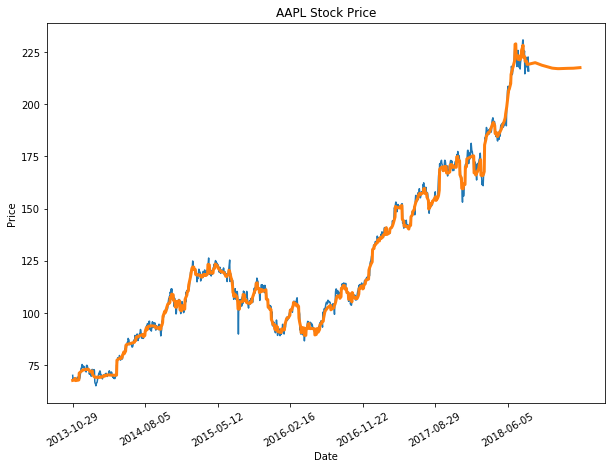

In [124]:
xrange = 1400
x = np.zeros((xrange, 2))
ind_cur = 0
trend_cur = search_scaled[ind_cur]
for i in range(len(x)):
    x[i, 0] = (i / num) - .7
    if (ind_cur < len(search_scaled) and search.index[ind_cur].year == int(df.index[i][:4]) and search.index[ind_cur].month == int(df.index[i][5:7]) and search.index[ind_cur].day <= int(df.index[i][8:])+2 and search.index[ind_cur].day >= int(df.index[i][8:])-2):
        trend_cur = search_scaled[ind_cur]
        ind_cur += 1
    x[i, 1] = trend_cur
y_pred = network.predict(x)
y_pred = scaler.inverse_transform(y_pred)[:,0]

step = 200
base = datetime.strptime(df.index[0], '%Y-%m-%d')
xlabels = [(base + timedelta(days=step*x*7/5)).date() for x in range(0, math.ceil(xrange/step))]

plt.figure(figsize=(10,7))
plt.plot(np.arange(0, num), stock)
plt.plot(np.arange(0, xrange), y_pred, lw=3)

plt.xlabel('Date')
plt.xticks(np.arange(0, 1400, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.title('AAPL' + ' Stock Price')
plt.show()
plt.close()

1259


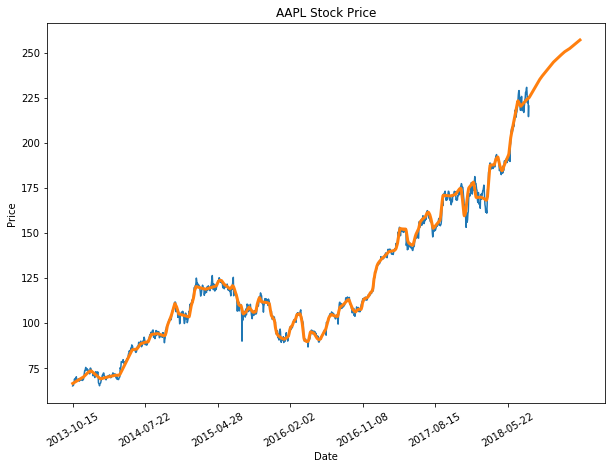

In [21]:
appl_net = stock_bot('AAPL')

In [ ]:
def stock_bot(stock_name, comp_name):
    start = datetime.today() - timedelta(370*5)
    end = datetime.today() - timedelta(1)
    df = web.DataReader(stock_name, 'iex', start, end)
    
    pytrends = TrendReq(hl='en-US', tz=300)
    frame = df.index[0] + ' ' + df.index[-1]
    pytrends.build_payload([comp_name], timeframe=frame, cat=0, geo='US')
    search = pytrends.interest_over_time()
    
    trend_max = max(search.values[:,0])
    trend_min = min(search.values[:,0])
    trend_range = trend_max - trend_min
    trend_med = trend_min + (trend_range / 2)
    search_scaled = np.zeros((len(search.values)))
    search_scaled = (search.values[:, 0] - trend_med) / trend_range

    x = np.zeros((num, 2))
    ind_cur = 0
    trend_cur = search_scaled[ind_cur]
    for i in range(len(x)):
        x[i, 0] = (i / num) - .7
        if (ind_cur < len(search_scaled) and search.index[ind_cur].year == int(df.index[i][:4]) and search.index[ind_cur].month == int(df.index[i][5:7]) and search.index[ind_cur].day <= int(df.index[i][8:])+2 and search.index[ind_cur].day >= int(df.index[i][8:])-2):
            trend_cur = search_scaled[ind_cur]
            ind_cur += 1
        x[i, 1] = trend_cur
        
    stock = df.loc[:,'open']
    num = len(stock)
    print(num)

    y = stock
    scaler = MinMaxScaler()
    y = np.array(stock).reshape(len(stock), 1)
    scaler = scaler.fit(y)
    y = scaler.transform(y)
    y = y.reshape(len(stock))

    shuffle_indices = np.random.permutation(np.arange(len(y)))
    y = y[shuffle_indices]
    x = x[shuffle_indices]

    network = models.Sequential()
    network.add(layers.Dense(256, activation='relu', input_shape=(2,)))
    network.add(layers.Dense(256, activation='relu'))
    network.add(layers.Dense(256, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))

    network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    history = network.fit(x, y, epochs=2000, batch_size=50, verbose=0)
    
    xrange = 1400
    x = np.zeros((xrange, 2))
    ind_cur = 0
    trend_cur = search_scaled[ind_cur]
    for i in range(len(x)):
        x[i, 0] = (i / num) - .7
        if (ind_cur < len(search_scaled) and search.index[ind_cur].year == int(df.index[i][:4]) and search.index[ind_cur].month == int(df.index[i][5:7]) and search.index[ind_cur].day <= int(df.index[i][8:])+2 and search.index[ind_cur].day >= int(df.index[i][8:])-2):
            trend_cur = search_scaled[ind_cur]
            ind_cur += 1
        x[i, 1] = trend_cur
    y_pred = network.predict(x)
    y_pred = scaler.inverse_transform(y_pred)[:,0]

    step = 200
    base = datetime.strptime(df.index[0], '%Y-%m-%d')
    xlabels = [(base + timedelta(days=step*x*7/5)).date() for x in range(0, math.ceil(xrange/step))]

    plt.figure(figsize=(10,7))
    plt.plot(np.arange(0, num), stock)
    plt.plot(np.arange(0, xrange), y_pred, lw=3)

    plt.xlabel('Date')
    plt.xticks(np.arange(0, 1400, step=step), xlabels, rotation=30)
    plt.ylabel('Price')
    plt.title(comp_name + ' Stock Price')
    plt.show()
    plt.close()

In [2]:
comp_name = 'Ford'

start = datetime.strptime(df.index[0], '%Y-%m-%d')
end = datetime.strptime(df.index[-1], '%Y-%m-%d')
pytrends = TrendReq(hl='en-US', tz=300)
search = pytrends.get_historical_interest([comp_name], year_start=start.year, month_start=start.month, day_start=start.day, hour_start=0, 
                                          year_end=end.year, month_end=end.month, day_end=end.day, hour_end=23, cat=0, geo='US')

NameError: name 'df' is not defined

In [ ]:
search.values[0]

In [3]:
start = datetime.today() - timedelta(370*5)
end = datetime.today() - timedelta(1)
df = web.DataReader('AAPL', 'iex', start, end)

stock = df.loc[:,'open']
num = len(stock)
print(num)

x = (np.arange(num)/(num))-.7
x = x.reshape(-1, 1)
y = stock

scaler = MinMaxScaler()
y = np.array(stock).reshape(len(stock), 1)
scaler = scaler.fit(y)
y = scaler.transform(y)
y = y.reshape(len(stock))

shuffle_indices = np.random.permutation(np.arange(len(y)))
y = y[shuffle_indices]
x = x[shuffle_indices]

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(1,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = network.fit(x, y, epochs=2000, batch_size=50, verbose=0)



1259


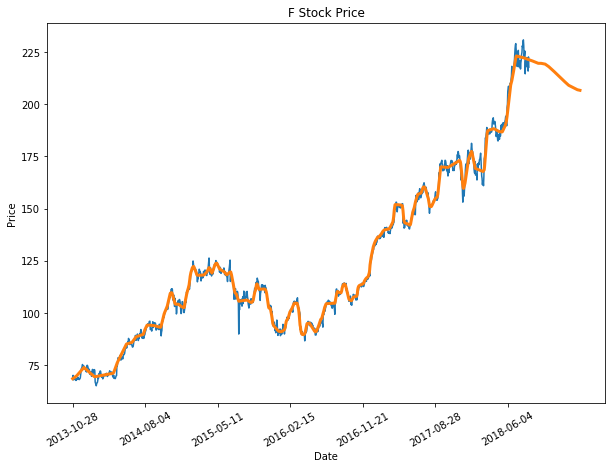

In [51]:
xrange = 1400
x = (np.arange(xrange)/(num))-.7
y_pred = network.predict(x)
y_pred = scaler.inverse_transform(y_pred)[:,0]

step = 200
base = datetime.strptime(df.index[0], '%Y-%m-%d')
xlabels = [(base + timedelta(days=step*x*7/5)).date() for x in range(0, math.ceil(xrange/step))]

plt.figure(figsize=(10,7))
plt.plot(np.arange(0, num), stock)
plt.plot(np.arange(0, xrange), y_pred, lw=3)

plt.xlabel('Date')
plt.xticks(np.arange(0, 1400, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.title('F' + ' Stock Price')
plt.show()
plt.close()

In [ ]:
def stock_bot(stock_name):
    start = datetime.today() - timedelta(370*5)
    end = datetime.today() - timedelta(1)
    df = web.DataReader(stock_name, 'iex', start, end)

    stock = df.loc[:,'open']
    num = len(stock)
    print(num)
    
    x = (np.arange(num)/num)-.7
    x = x.reshape(-1, 1)
    y = stock

    scaler = MinMaxScaler()
    y = np.array(stock).reshape(len(stock), 1)
    scaler = scaler.fit(y)
    y = scaler.transform(y)
    y = y.reshape(len(stock))

    shuffle_indices = np.random.permutation(np.arange(len(y)))
    y = y[shuffle_indices]
    x = x[shuffle_indices]

    network = models.Sequential()
    network.add(layers.Dense(256, activation='relu', input_shape=(1,)))
    network.add(layers.Dense(256, activation='relu'))
    network.add(layers.Dense(256, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))

    network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    history = network.fit(x, y, epochs=2000, batch_size=50, verbose=0)
    
    xrange = 1400
    x = (np.arange(xrange)/num)-.7
    y_pred = network.predict(x)
    y_pred = scaler.inverse_transform(y_pred)[:,0]

    step = 200
    base = datetime.strptime(df.index[0], '%Y-%m-%d')
    xlabels = [(base + timedelta(days=step*x*7/5)).date() for x in range(0, math.ceil(xrange/step))]

    plt.figure(figsize=(10,7))
    plt.plot(np.arange(0, num), stock)
    plt.plot(np.arange(0, xrange), y_pred, lw=3)

    plt.xlabel('Date')
    plt.xticks(np.arange(0, 1400, step=step), xlabels, rotation=30)
    plt.ylabel('Price')
    plt.title(stock_name + ' Stock Price')
    plt.show()
    plt.close()
    
    return network

1259


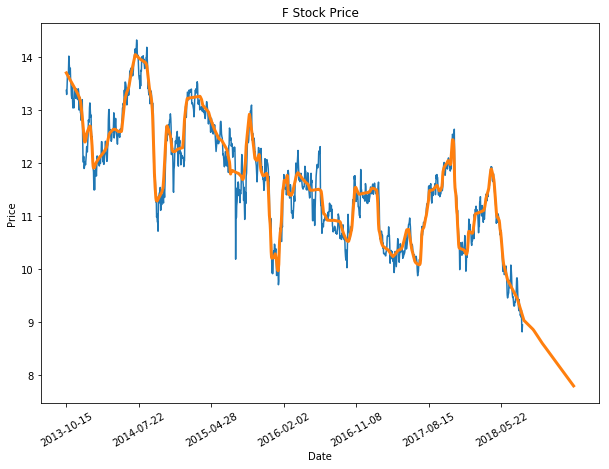

In [20]:
f_net = stock_bot('F')

1259


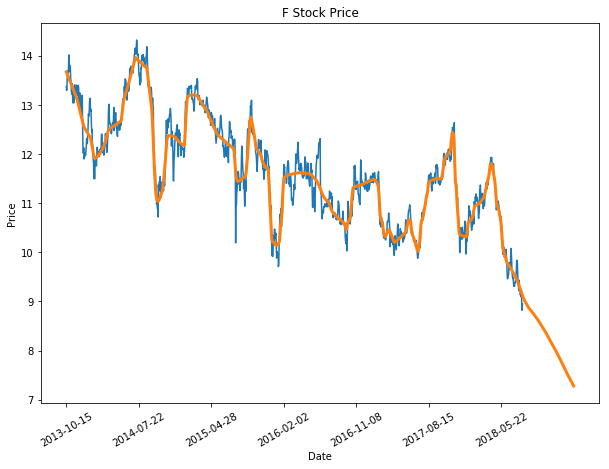

In [12]:
f_net = stock_bot('F')

1259


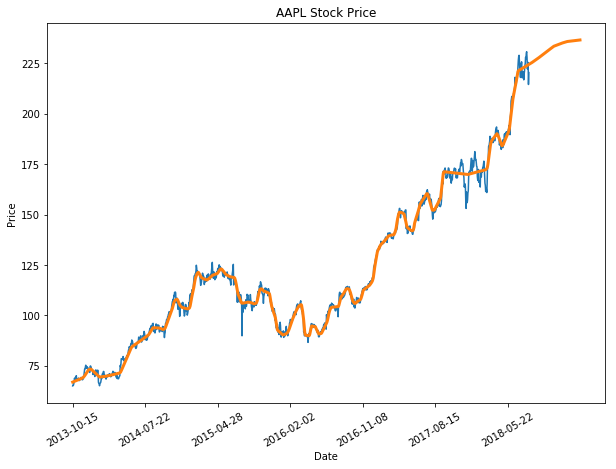

In [13]:
appl_net = stock_bot('AAPL')

## Before

1259


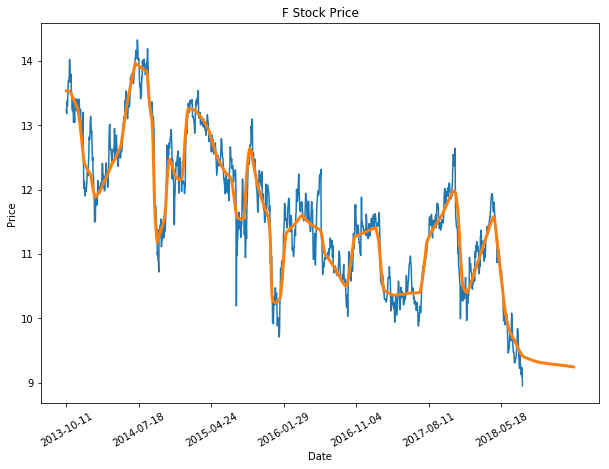

In [26]:
f_net = stock_bot('F')

1259


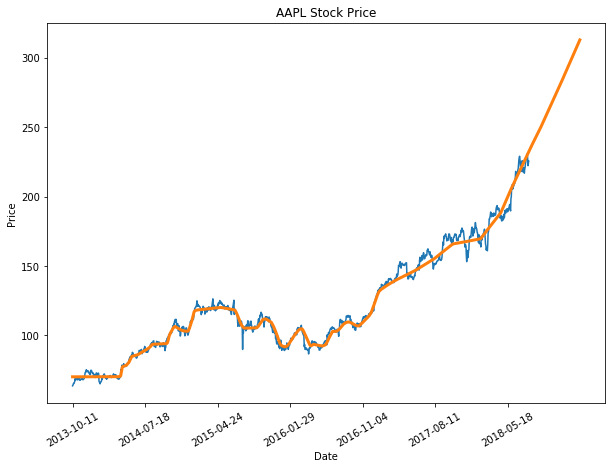

In [27]:
appl_net = stock_bot('AAPL')

1259


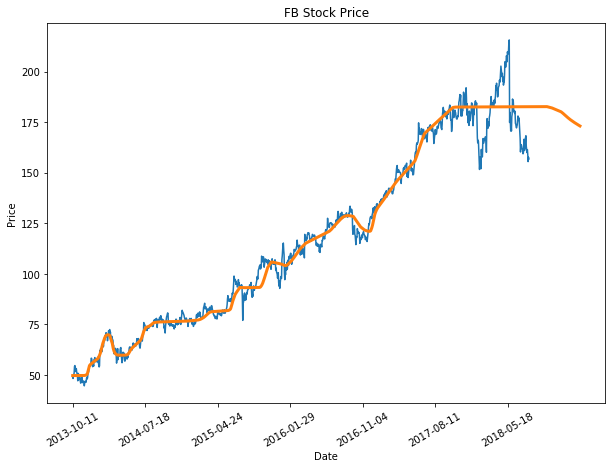

In [28]:
fb_net = stock_bot('FB')